In [1]:
from termcolor import colored
import pandas as pd
from natsort import natsorted

from clasificacion_humedales.utils.clustering import *
from clasificacion_humedales.utils.utils_maia import save_clustering, load_from_file, save_in_file, read_image
from clasificacion_humedales.utils.comparaciones import percentage_of_each_cluster, plot_heatmap

In [2]:
PATH_IN, PATH_OUT = directories()
PATH_OUT += 'clustering_gt/'
data = read_image(PATH_IN + "grid5classes.tif")

In [3]:
W = (data.sum(axis=0) > 620)
nW = (data.sum(axis=0) == 0)

W.sum()
data.shape[1] * data.shape[2] - (W.sum() + nW.sum())
nW.sum()

info = data[:, W] / 625

# Number of samples per component
n_samples = info.shape[1]

# Generate sample, five components
X = info.T


/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [4]:
Y_ = load_from_file(PATH_OUT + 'mapa_gt_clustered.pkl')
Y_ = np.reshape(Y_, W.shape)[W]
#Y_ = clf.predict(X)
n = Y_.max() + 1

clases = np.unique(Y_)

purity_of_classes = []
for i in clases:
    w = (Y_ == i)
    m = X[w].mean(axis=0)
    s = X[w].std(axis=0)
    print(f'{i:>2d}: {w.sum():>5d}', end='')
    for j in range(5):
        v = m[j]
        vs = s[j]
        ft = f'{v:>1.2f} ({vs:0.1f})'
        print('   ', end='')
        if v < 0.2:
            cft = colored(ft, 'green')
        elif v < 0.5:
            cft = colored(ft, 'green', attrs=['bold'])
        elif v < 0.75:
            cft = colored(ft, 'red', 'on_green')
        else:
            cft = colored(ft, 'red', attrs=['bold'])

        print(cft, end='')
    purity_of_classes.append(m*100)
    print()

 0:  2003   0.00 (0.0)   0.03 (0.0)   0.66 (0.3)   0.32 (0.3)   0.00 (0.0)
 1:  4026   0.00 (0.0)   0.00 (0.0)   0.00 (0.0)   0.24 (0.2)   0.76 (0.2)
 2:  3439   0.00 (0.0)   0.00 (0.0)   0.00 (0.0)   0.83 (0.1)   0.17 (0.1)
 3:  2215   1.00 (0.0)   0.00 (0.0)   0.00 (0.0)   0.00 (0.0)   0.00 (0.0)
 4:   396   0.07 (0.1)   0.25 (0.2)   0.35 (0.2)   0.00 (0.0)   0.34 (0.3)
 5:   208   0.08 (0.1)   0.03 (0.0)   0.72 (0.1)   0.09 (0.1)   0.08 (0.1)
 6:  1097   0.00 (0.0)   0.21 (0.2)   0.00 (0.0)   0.22 (0.2)   0.57 (0.2)
 7:  1518   0.28 (0.3)   0.11 (0.1)   0.45 (0.2)   0.16 (0.1)   0.00 (0.0)
 8:  1006   0.35 (0.3)   0.07 (0.1)   0.00 (0.0)   0.23 (0.2)   0.36 (0.2)
 9:  1092   0.09 (0.1)   0.41 (0.3)   0.00 (0.0)   0.01 (0.0)   0.49 (0.3)
10:  1440   0.12 (0.1)   0.00 (0.0)   0.69 (0.2)   0.20 (0.2)   0.00 (0.0)
11:   805   0.09 (0.1)   0.00 (0.0)   0.00 (0.0)   0.02 (0.0)   0.89 (0.1)
12:   533   0.22 (0.2)   0.20 (0.2)   0.31 (0.2)   0.05 (0.0)   0.22 (0.2)
13:   844   0.00 (0.0)   

In [5]:
location_of_uhs = []
percentage_of_each_uh =[]
for uh in range(0,5):
    total_pixels_uh = X[:,uh].sum()
    percentage_of_each_uh.append(total_pixels_uh*100/len(X))
    row_for_uh = []
    for cluster in np.unique(Y_):
        pixels_uh_in_cluster = (X[Y_==cluster][:,uh]).sum()
        row_for_uh.append(pixels_uh_in_cluster*100/total_pixels_uh)
    location_of_uhs.append(row_for_uh)
    
clusters_gt = [f'{key}: {value.round(3)}%' for key, value in percentage_of_each_cluster(Y_).items()]
uh_names = ['Cursos de agua', 'Bosques', 'Espiras c/ mosaico \n de herbáceas', 'Lagunas', 'Media loma']
uhs = [f'{i} - {uh_names[i]}: {percentage_of_each_uh[i].round(2)}%' for i in range(5)]
    
df=pd.DataFrame(location_of_uhs, columns=clusters_gt, index=uhs)
df.index.name='UH'
df.columns.name='clases GT'
ordered_df=df.reindex(natsorted(df.index), columns=natsorted(df.columns))

<AxesSubplot:xlabel='clases GT', ylabel='UH'>

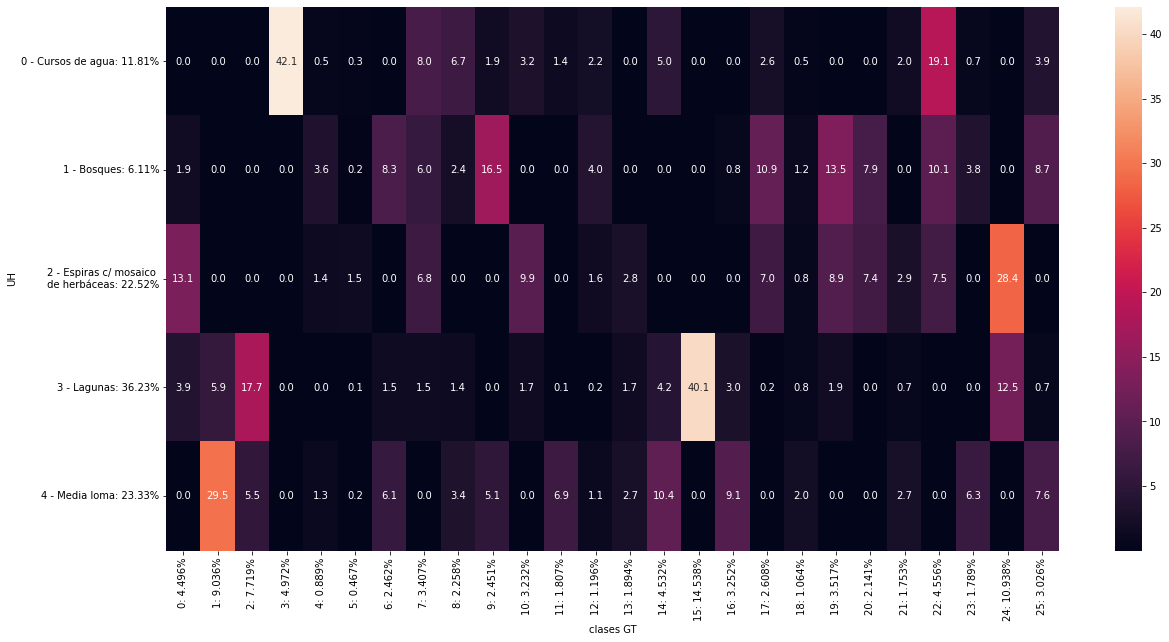

In [6]:
plot_heatmap(ordered_df, save_plot=False)

<AxesSubplot:xlabel='UH', ylabel='clases GT'>

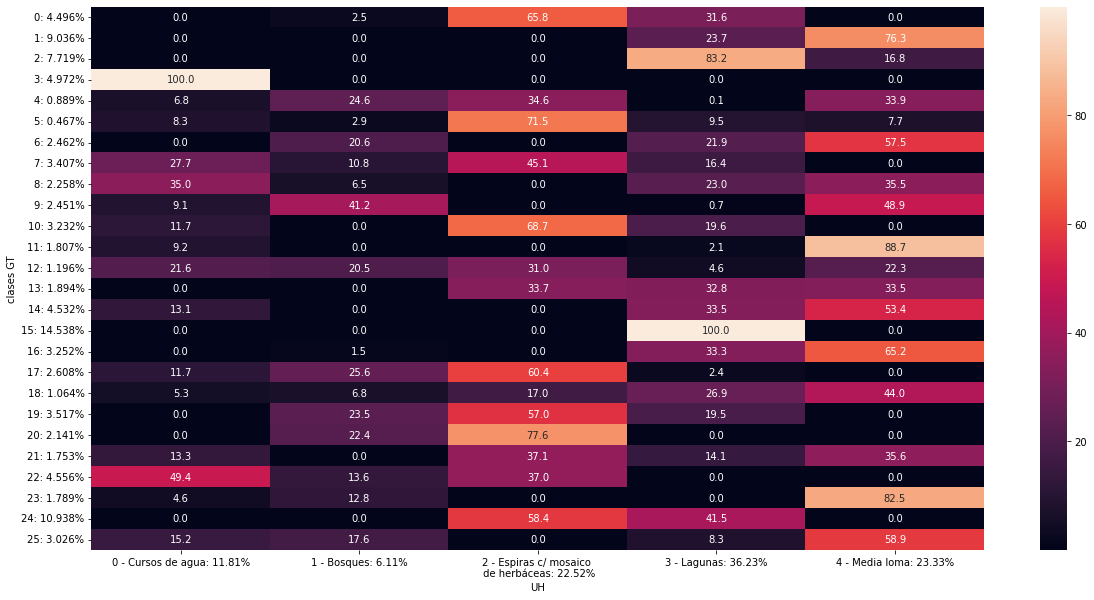

In [8]:
purity_of_classes=np.array(purity_of_classes)
df=pd.DataFrame(purity_of_classes, columns=uhs, index=clusters_gt)
df.columns.name='UH'
df.index.name='clases GT'
ordered_df=df.reindex(natsorted(df.index), columns=natsorted(df.columns))

plot_heatmap(ordered_df, save_plot=False)